In [328]:
import numpy as np
import matplotlib.pyplot as plt

In [329]:
def seir_model(population, transmission_coeff, latency=1., infectious_time=5., h=.5, end_time=60, infectious_start=1e5, vaccinated=0):
    steps = int(end_time / h)
    s = np.zeros(steps + 1)
    e = np.zeros(steps + 1)
    i = np.zeros(steps + 1)
    r = np.zeros(steps + 1)
    t = np.zeros(steps + 1)

    s[0] = population - infectious_start - vaccinated
    e[0] = 0.
    i[0] = infectious_start
    r[0] = vaccinated
    t[0] = 0

    for step in range(steps):
        s2e = h * transmission_coeff * s[step] * i[step]
        e2i = h / latency * e[step]
        i2r = h / infectious_time * i[step]
        
        s[step + 1] = s[step] - s2e
        e[step + 1] = e[step] + s2e - e2i
        i[step + 1] = i[step] + e2i - i2r
        r[step + 1] = r[step] + i2r
        t[step + 1] = t[step] + h

    return s, e, i, r, t


def plot_seir_model(s, e, i, r, t):
    plt.title("SEIR model")
    plt.plot(t, s, label="Susceptible")
    plt.plot(t, e, label="Exposed")
    plt.plot(t, i, label="Infectious")
    plt.plot(t, r, label="Recovered")
    plt.xlabel("Time in days")
    plt.ylabel("Number of persons")
    plt.legend()
    plt.show()

#### SEIR model voor mijn studentnummer; 1745377

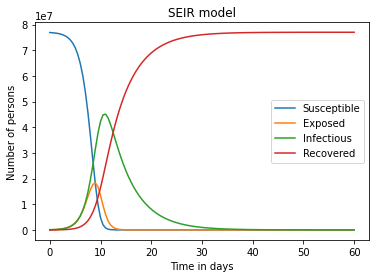

In [330]:
population = 7.7e7 # 77 miljoen
average_contacts = 53
infection_prob = 0.04 # 4%
transmission_coeff = average_contacts * infection_prob / population
s, e, i, r, t = seir_model(population, transmission_coeff)
plot_seir_model(s, e, i, r, t)

#### Minimaal aantal gevaccineerden om epidemie te voorkomen

In [331]:
# https://en.wikipedia.org/wiki/Epidemic
# For example, in meningococcal infections, an attack rate in excess of 15 cases per 100,000 people for two consecutive weeks is considered an epidemic.[1][2]
# 15 / 100,000 = 0.00015
# Dus als 0.015 % van 100,000 twee weken achter elkaar besmet raakt is er sprake van een epidemie
# Voor een populatie van 77 miljoen is dat 77,000,000 / 100,000 * 15 (of 77 miljoen * 0.00015) = 11550 cases per 77,000,000 people
population = 7.7e7 # 77 miljoen
average_contacts = 53
infection_prob = 0.04 # 4%
transmission_coeff = average_contacts * infection_prob / population
epidemic_limit = population * 0.00015

def min_vaccinated():
    for v in range(0, int(population), int(population / 1000)):
        s, e, i, r, t = seir_model(population, transmission_coeff, h=1, vaccinated=v) # h=1 for steps in days
        counter = 0
        for infected in i:
            if infected < epidemic_limit:
                counter += 1
                if counter == 14: # two consecutive weeks == 14 days
                    return v
            else:
                counter = 0

v = min_vaccinated()
print(f"{int(epidemic_limit)} infectious people for 14 days consecutive are needed for a epidemic")
print("Vaccinations needed:", v)
print(f"That is {int(v / population * 100)}% of total population")

11549 infectious people for 14 days consecutive are needed for a epidemic
Vaccinations needed: 71225000
That is 92% of total population


#### Latency = 2

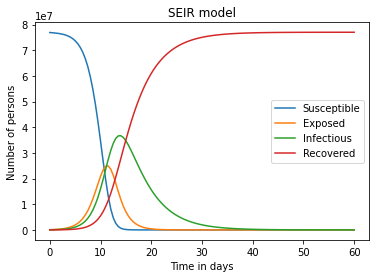

In [332]:
# Studentnummer: 1745377
latency = 2
population = 7.7e7 # 77 miljoen
average_contacts = 53
infection_prob = 0.04 # 4%
transmission_coeff = average_contacts * infection_prob / population
s, e, i, r, t = seir_model(population, transmission_coeff, latency)
plot_seir_model(s, e, i, r, t)